In [141]:
import pandas as pd
orders = pd.read_csv('../data/Orders.csv')
returns = pd.read_csv('../data/Returns.csv')
import seaborn as sns

In [142]:
orders.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-$288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-$96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.04,Critical


In [143]:
returns.head()

,Returned,Order ID,Region
0,Yes,CA-2012-SA20830140-41210,Central US
1,Yes,IN-2012-PB19210127-41259,Eastern Asia
2,Yes,CA-2012-SC20095140-41174,Central US
3,Yes,IN-2015-JH158207-42140,Oceania
4,Yes,IN-2014-LC168857-41747,Oceania


In [144]:
orders.isna().sum(axis = 0)

Row.ID                0
Order.ID              0
Order.Date            0
Ship.Date             0
Ship.Mode             0
Customer.ID           0
Customer.Name         0
Segment               0
Postal.Code       41296
City                  0
State                 0
Country               0
Region                0
Market                0
Product.ID            0
Category              0
Sub.Category          0
Product.Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping.Cost         0
Order.Priority        0
dtype: int64

In [145]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row.ID          51290 non-null  int64  
 1   Order.ID        51290 non-null  object 
 2   Order.Date      51290 non-null  object 
 3   Ship.Date       51290 non-null  object 
 4   Ship.Mode       51290 non-null  object 
 5   Customer.ID     51290 non-null  object 
 6   Customer.Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   Postal.Code     9994 non-null   float64
 9   City            51290 non-null  object 
 10  State           51290 non-null  object 
 11  Country         51290 non-null  object 
 12  Region          51290 non-null  object 
 13  Market          51290 non-null  object 
 14  Product.ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub.Category    51290 non-null  object 
 17  Product.Name    51290 non-null 

In [146]:
orders[['Sales','Profit']].head()

,Sales,Profit
0,$221.98,$62.15
1,"$3,709.40",-$288.77
2,"$5,175.17",$919.97
3,"$2,892.51",-$96.54
4,"$2,832.96",$311.52


In [147]:
orders['Sales'] = orders['Sales'].apply(lambda s: s.replace('$','').replace(',',''))
orders['Sales'] = pd.to_numeric(orders['Sales'])

orders['Profit'] = orders['Profit'].apply(lambda s: s.replace('$','').replace(',',''))
orders['Profit'] = pd.to_numeric(orders['Profit'])

In [148]:
orders['Sales'].head()

0     221.98
1    3709.40
2    5175.17
3    2892.51
4    2832.96
Name: Sales, dtype: float64

In [149]:
orders['Profit'].head()

0     62.15
1   -288.77
2    919.97
3    -96.54
4    311.52
Name: Profit, dtype: float64

In [150]:
orders.info()
orders['Order.Date'] = pd.to_datetime(orders['Order.Date'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row.ID          51290 non-null  int64  
 1   Order.ID        51290 non-null  object 
 2   Order.Date      51290 non-null  object 
 3   Ship.Date       51290 non-null  object 
 4   Ship.Mode       51290 non-null  object 
 5   Customer.ID     51290 non-null  object 
 6   Customer.Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   Postal.Code     9994 non-null   float64
 9   City            51290 non-null  object 
 10  State           51290 non-null  object 
 11  Country         51290 non-null  object 
 12  Region          51290 non-null  object 
 13  Market          51290 non-null  object 
 14  Product.ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub.Category    51290 non-null  object 
 17  Product.Name    51290 non-null 

In [151]:
inventory = orders.groupby('Order.Date')[['Quantity']].sum()

In [152]:
inventory.reset_index(inplace = True)
inventory

,Order.Date,Quantity
0,2012-01-01,19
1,2012-01-02,1
2,2012-01-03,48
3,2012-01-04,52
4,2012-01-05,24
...,...,...
1425,2015-12-27,188
1426,2015-12-28,51
1427,2015-12-29,408
1428,2015-12-30,284


<AxesSubplot:xlabel='Order.Date'>

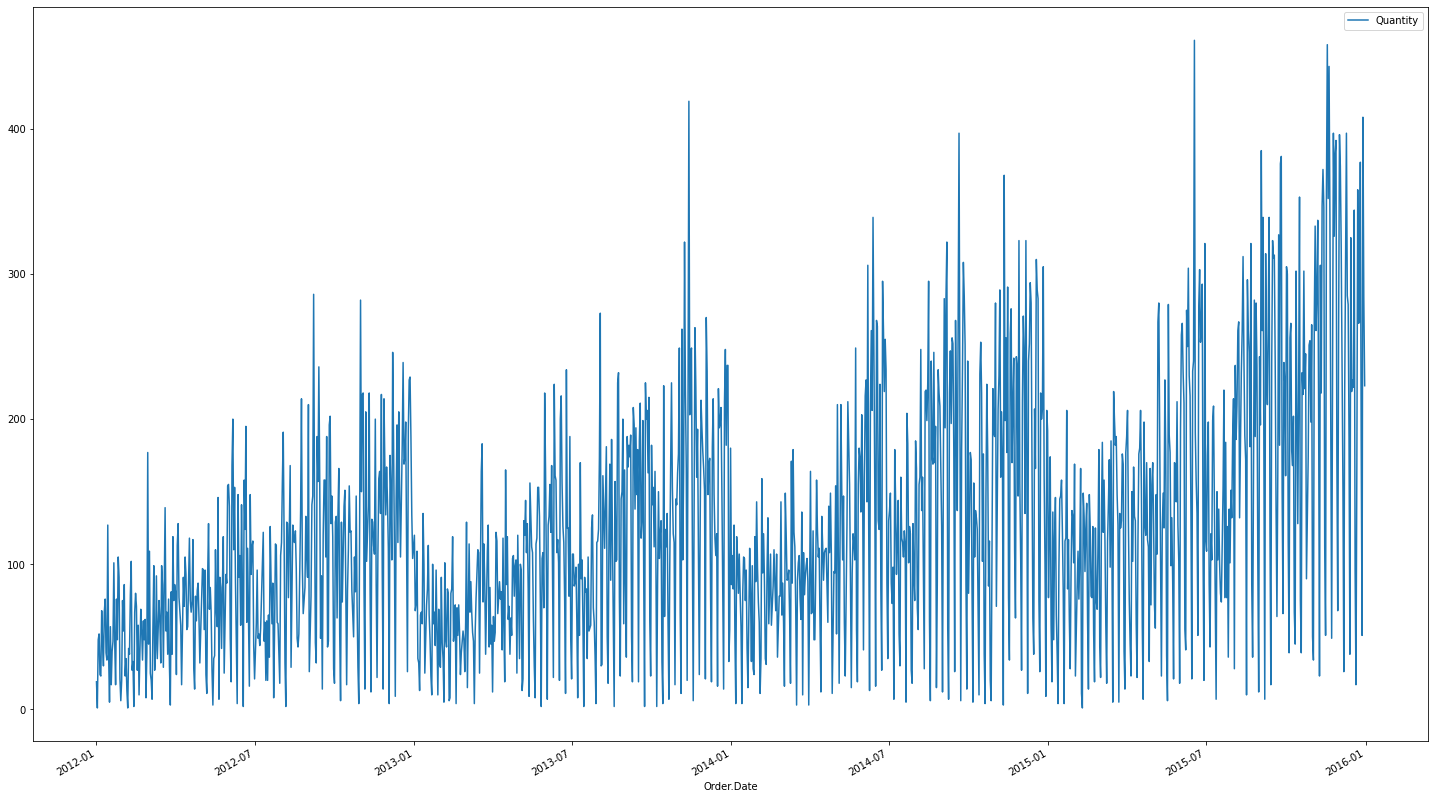

In [153]:
import matplotlib.pyplot as plt
inventory.plot(kind = 'line', x = 'Order.Date', y = 'Quantity',figsize = (25,15))

In [154]:
inv_category = orders.groupby(['Order.Date','Category'])[['Quantity']].sum()
inv_category.reset_index(inplace = True)

<AxesSubplot:xlabel='Order.Date', ylabel='Quantity'>

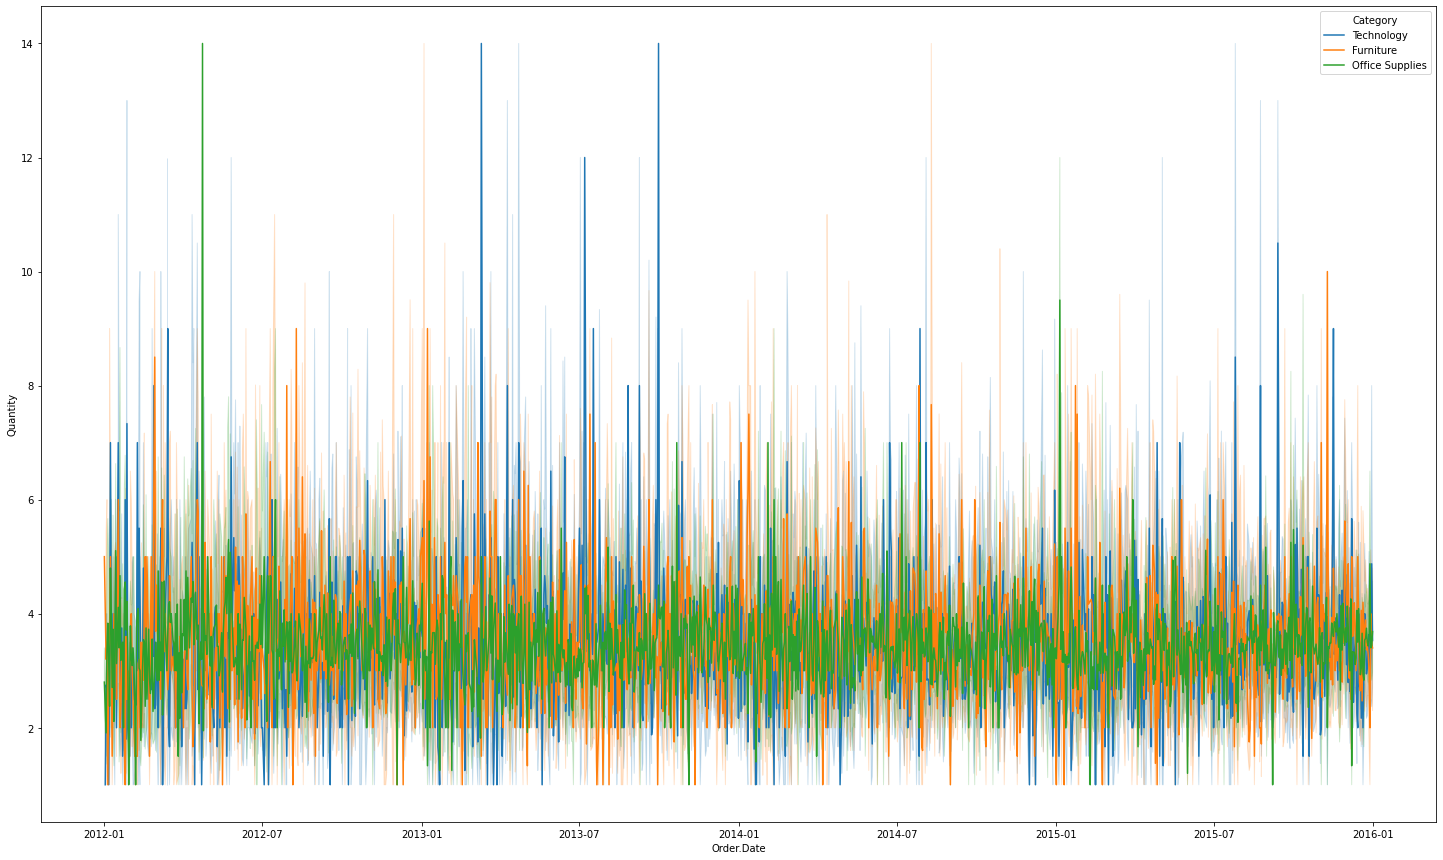

In [155]:
fig = plt.figure(figsize = (25,15))
sns.lineplot(data = orders, x = 'Order.Date', y = 'Quantity',hue = 'Category')

In [156]:
orders.Segment.value_counts()

Consumer       26518
Corporate      15429
Home Office     9343
Name: Segment, dtype: int64

In [157]:
df = orders.merge(returns, how = 'left',left_on = 'Order.ID', right_on = 'Order ID')

In [158]:
returned = df.loc[df['Returned']=='Yes']

In [159]:
#returned = df.loc[df.Returned == 'Yes']
customer_returns = returned.groupby('Customer.ID')[['Order.ID']].count()

In [160]:
returned['Order.Year'] = returned['Order.Date'].dt.year

/Users/pizac/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [161]:
profit_loss = returned.groupby('Order.Year')['Profit'].sum().reset_index()

Text(0, 0.5, 'Profit loss (USD)')

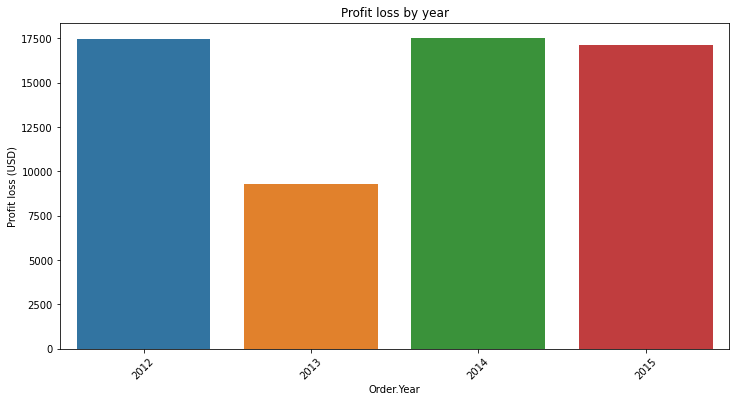

In [162]:
import seaborn as sns
plt.figure(figsize = (12,6))
sns.barplot(data = profit_loss, x = 'Order.Year', y = 'Profit')
plt.xticks(rotation = 45)
plt.title('Profit loss by year')
plt.ylabel('Profit loss (USD)')

In [163]:
customer_returns.loc[customer_returns['Order.ID']>1].sum()
print('1706 customers returned more than once.')

1706 customers returned more than once.


In [164]:
customer_returns.loc[customer_returns['Order.ID']>5].sum()
print('328 customers returned more than five times.')

328 customers returned more than five times.


In [165]:
region = returned.groupby('Region_x')['Order.ID'].count().reset_index().sort_values(by = 'Order.ID', ascending = False)

Text(0, 0.5, 'Number of returned orders')

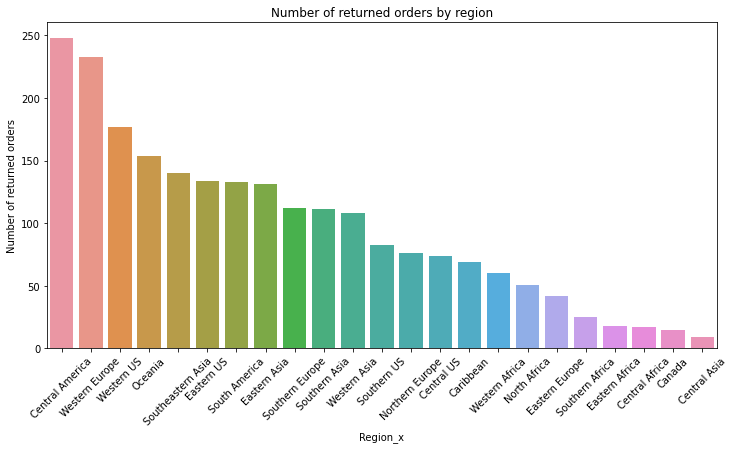

In [166]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (12,6))
sns.barplot(data = region, x = 'Region_x', y = 'Order.ID')
plt.xticks(rotation = 45)
plt.title('Number of returned orders by region')
plt.ylabel('Number of returned orders')

<p> Central America returned the most orders out of any other region, followed by Western Europe and the Western US </p>

In [167]:
category = returned.groupby('Sub.Category')['Order.ID'].count().reset_index().sort_values(by = 'Order.ID', ascending = False)

Text(0, 0.5, 'Number of returned orders')

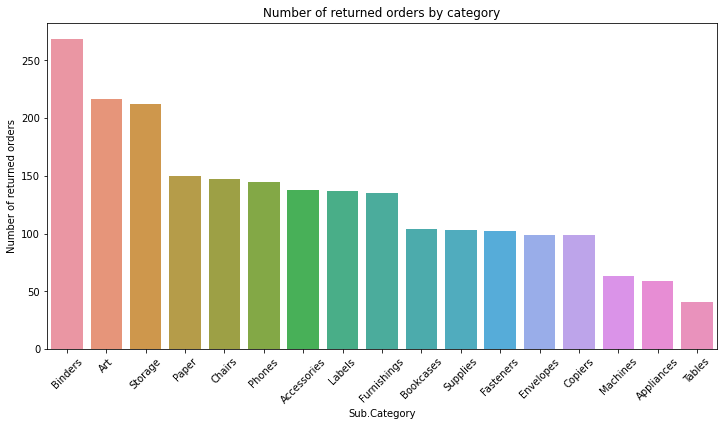

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (12,6))
sns.barplot(data = category, x = 'Sub.Category', y = 'Order.ID')
plt.xticks(rotation = 45)
plt.title('Number of returned orders by category')
plt.ylabel('Number of returned orders')

<p> Binders are the category most likely to be returned, followed by Art and Storage.</p>

In [169]:
df['Ship.Date'] = pd.to_datetime(df['Ship.Date'])
df['Process.Time'] = df['Ship.Date']-df['Order.Date']

In [170]:
df['Returned'].fillna('No',inplace = True)

In [171]:
df['Returned'].value_counts()

No     49070
Yes     2220
Name: Returned, dtype: int64

In [172]:
df['Returned'] = df['Returned'].replace({'Yes':1,'No':0})

In [176]:
return_count = df.groupby('Product.ID')['Returned'].sum().reset_index()
return_count.columns = ['Product.ID','count']
df = df.merge(return_count, on = 'Product.ID')

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51290 entries, 0 to 51289
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   Row.ID          51290 non-null  int64          
 1   Order.ID        51290 non-null  object         
 2   Order.Date      51290 non-null  datetime64[ns] 
 3   Ship.Date       51290 non-null  datetime64[ns] 
 4   Ship.Mode       51290 non-null  object         
 5   Customer.ID     51290 non-null  object         
 6   Customer.Name   51290 non-null  object         
 7   Segment         51290 non-null  object         
 8   Postal.Code     9994 non-null   float64        
 9   City            51290 non-null  object         
 10  State           51290 non-null  object         
 11  Country         51290 non-null  object         
 12  Region_x        51290 non-null  object         
 13  Market          51290 non-null  object         
 14  Product.ID      51290 non-null  object

In [ ]:
from sklearn.linear_model import LogisticRegression
glm = LogisticRegression()

from sklearn.model_selection import train_test_split

print('Best metric may be misclassification')